In [1]:
# import sys
# import os
# # sys.path is a list of absolute path strings
# sys.path.append('/home/sanghyuk.kim001/MELANOMA/melanoma-detection-CNN/')

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")


import melanoma as mel

2023-11-03 22:44:38.156134: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload -p 2

# from IPython.core.debugger import Pdb

In [3]:
# dir = os.path.realpath('.') + '/melanoma-detection-CNN'

dbpath = './HAM10000_images_combined'
utilInstance = mel.Util(dbpath)
dbtype = mel.DatasetType.HAM10000
data_gen, trainimages, testimages, validationimages, trainlabels, testlabels, validationlabels, num_classes = utilInstance.loadMelanomaDataset(dbtype)

DEBUG:HAM10000 classification example:path:  HAM10000_images_combined
DEBUG:HAM10000 classification example:seed value:  1
DEBUG:HAM10000 classification example:color_mode:  rgb
DEBUG:HAM10000 classification example:Images available in train dataset: 10015
DEBUG:HAM10000 classification example:Let's check metadata briefly -> df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


DEBUG:HAM10000 classification example:Let's add some more columns on top of the original metadata for better readability
DEBUG:HAM10000 classification example:Added columns: 'num_images', 'lesion_id', 'image_id', 'path', 'cell_type'
DEBUG:HAM10000 classification example:Now, let's show some of records -> df.sample(5)


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,num_images,path,cell_type,cell_type_idx
6095,HAM_0005944,ISIC_0030850,nv,follow_up,45.0,male,abdomen,vidir_molemax,1,./HAM10000_images_combined/ISIC_0030850.jpg,Melanocytic nevi,5
6218,HAM_0004469,ISIC_0025787,nv,follow_up,30.0,female,upper extremity,vidir_molemax,1,./HAM10000_images_combined/ISIC_0025787.jpg,Melanocytic nevi,5
4144,HAM_0003714,ISIC_0026064,nv,follow_up,55.0,female,abdomen,vidir_molemax,1,./HAM10000_images_combined/ISIC_0026064.jpg,Melanocytic nevi,5
5200,HAM_0006951,ISIC_0030482,nv,follow_up,45.0,male,trunk,vidir_molemax,1,./HAM10000_images_combined/ISIC_0030482.jpg,Melanocytic nevi,5
1334,HAM_0001531,ISIC_0030106,mel,histo,70.0,male,back,vidir_modern,2,./HAM10000_images_combined/ISIC_0030106.jpg,Melanoma,4


DEBUG:HAM10000 classification example:Check null data in metadata -> df.isnull().sum()


lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
dataset           0
num_images        0
path              0
cell_type         0
cell_type_idx     0
dtype: int64

DEBUG:HAM10000 classification example:We found there are some null data in age category. Let's fill them with average data

DEBUG:HAM10000 classification example:df.age.fillna((df.age.mean()), inplace=True) --------------------
DEBUG:HAM10000 classification example:Let's check null data now -> print(df.isnull().sum())

DEBUG:HAM10000 classification example:There are no null data as below:


lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
dataset          0
num_images       0
path             0
cell_type        0
cell_type_idx    0
dtype: int64

In [4]:
base_model = mel.CNN(None, None, None, num_classes)
ResNet50_name = 'my resnet50'
Resnet50_model = base_model.resnet50(ResNet50_name)

2023-11-03 22:46:13.840042: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-11-03 22:46:14.017352: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-11-03 22:46:14.017389: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-11-03 22:46:14.020686: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-11-03 22:46:14.020719: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-11-03 22:46:14.021586: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2

Building my resnet50 model...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 903       
Total params: 23,850,887
Trainable params: 263,175
Non-trainable params: 23,587,712
_________________________________________________________________
None


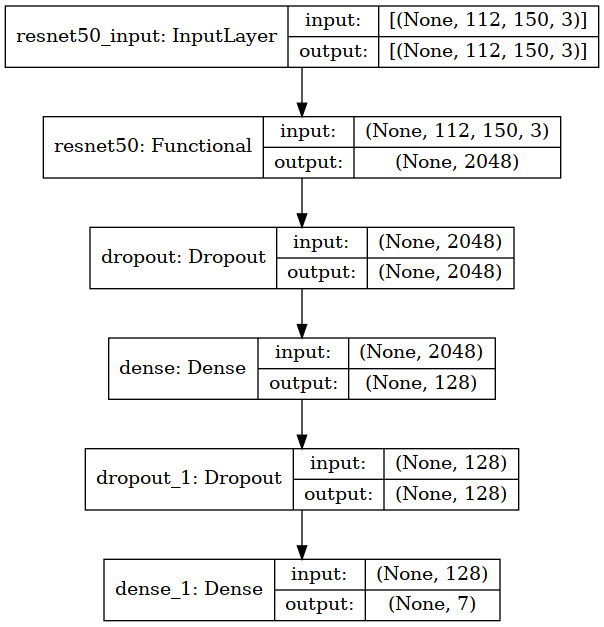

In [5]:
# Install the below beforehand
# pip install pydot
# conda install -c anaconda graphviz
visualizer = mel.Visualizer()
visualizer.visualize_model(model = Resnet50_model, model_name = ResNet50_name)

In [6]:
history = base_model.fit_model(    
    model = Resnet50_model,
    model_name = ResNet50_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
    data_gen = data_gen
)


Fitting my resnet50 model...


2023-11-03 22:46:26.879558: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-11-03 22:46:26.899171: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245720000 Hz


Epoch 1/30


2023-11-03 22:46:28.901894: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-11-03 22:46:29.508177: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-11-03 22:46:30.155819: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-11-03 22:46:30.155843: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-11-03 22:46:30.155901: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-11-03 22:46:30.941331: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-11-03 22:46:31.658057: I tensorflow/stream_exec

  3/401 [..............................] - ETA: 26s - loss: 9.9140 - accuracy: 0.1333   

2023-11-03 22:46:49.400970: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


401/401 [==============================] - 90s 168ms/step - loss: 5.9719 - accuracy: 0.5474 - val_loss: 4.4672 - val_accuracy: 0.8199


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
401/401 [==============================] - 30s 74ms/step - loss: 4.2918 - accuracy: 0.6308 - val_loss: 3.4729 - val_accuracy: 0.8222
Epoch 3/30
401/401 [==============================] - 30s 75ms/step - loss: 3.3933 - accuracy: 0.6506 - val_loss: 2.7581 - val_accuracy: 0.8199
Epoch 4/30
401/401 [==============================] - 30s 75ms/step - loss: 2.7716 - accuracy: 0.6589 - val_loss: 2.2638 - val_accuracy: 0.8301
Epoch 5/30
401/401 [==============================] - 30s 74ms/step - loss: 2.3394 - accuracy: 0.6701 - val_loss: 1.8817 - val_accuracy: 0.8313
Epoch 6/30
401/401 [==============================] - 30s 75ms/step - loss: 2.0294 - accuracy: 0.6744 - val_loss: 1.5792 - val_accuracy: 0.8381
Epoch 7/30
401/401 [==============================] - 30s 74ms/step - loss: 1.7749 - accuracy: 0.6852 - val_loss: 1.3437 - val_accuracy: 0.8381
Epoch 8/30
401/401 [==============================] - 30s 74ms/step - loss: 1.6054 - accuracy: 0.6877 - val_loss: 1.2443 - val_accuracy:

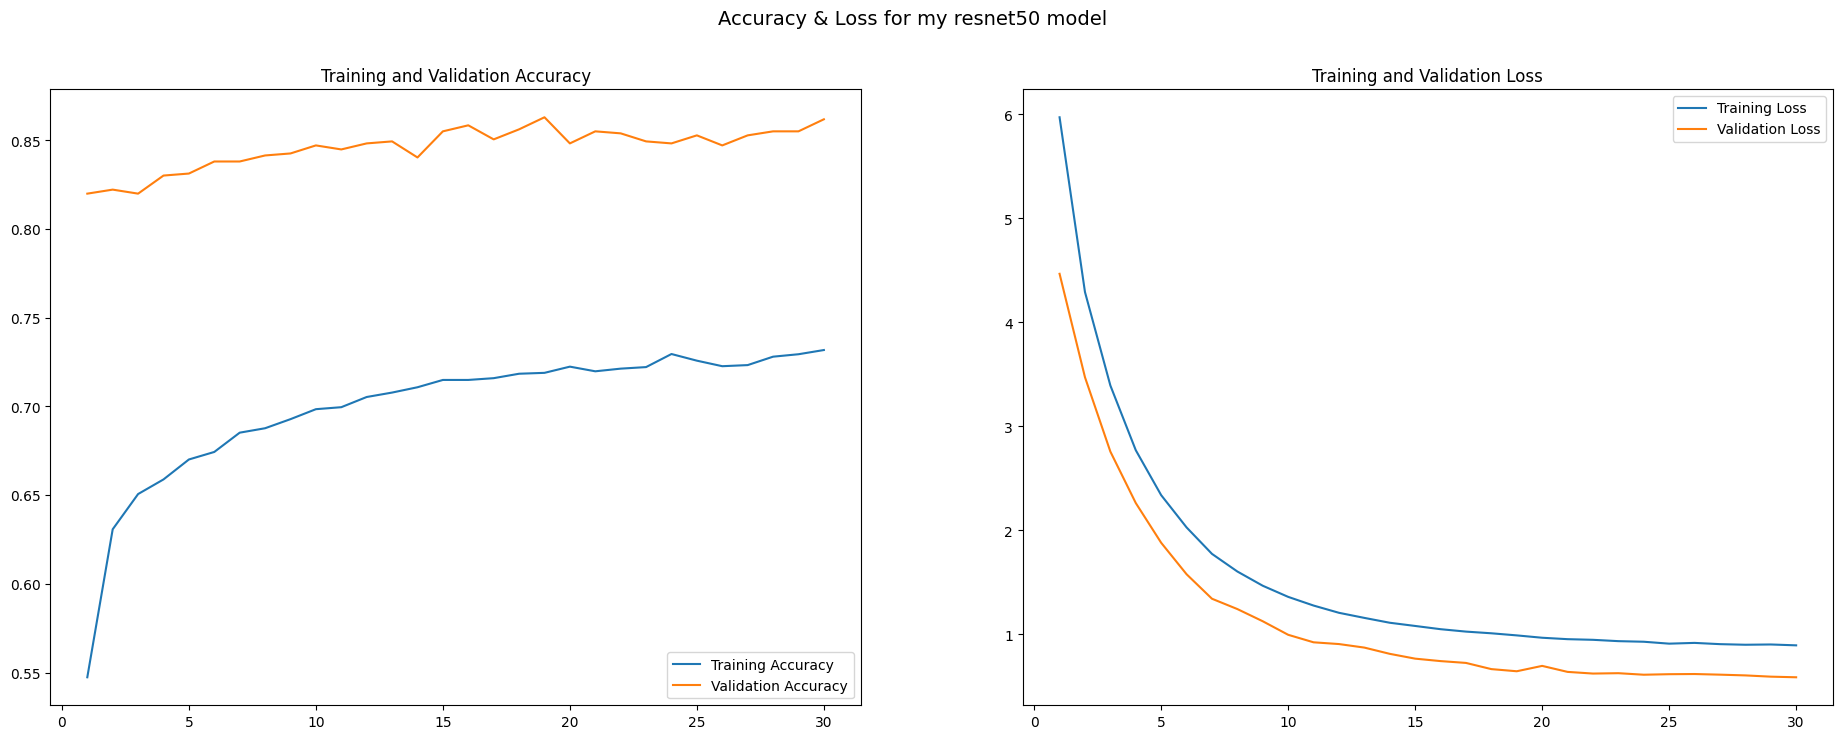

In [7]:
visualizer.visualize_performance(
    model_name = ResNet50_name,
    history = history
)


In [8]:
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = ResNet50_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
    testimages = testimages,
    testlabels = testlabels
)


Evaluating my resnet50 model...

251/251 [==============================] - 42s 89ms/step - loss: 0.8371 - accuracy: 0.7497
Train loss = 0.8370585441589355  ;  Train accuracy = 74.97%

28/28 [==============================] - 19s 699ms/step - loss: 0.5963 - accuracy: 0.8562
Validation loss = 0.5962871313095093  ;  Validation accuracy = 85.62%

35/35 [==============================] - 19s 555ms/step - loss: 0.5945 - accuracy: 0.8694
Test loss = 0.594517171382904  ;  Test accuracy = 86.94%


In [9]:
train_pred, train_pred_classes, test_pred, test_pred_classes = base_model.computing_prediction(
    model = Resnet50_model,
    model_name = ResNet50_name,
    trainimages = trainimages,
    testimages = testimages
)

test_pred, test_pred_classes

Computing predictions for my resnet50...


(array([[1.5210290e-04, 3.1847722e-04, 8.5413881e-04, ..., 2.8520781e-03,
         9.9471200e-01, 7.4238383e-04],
        [7.7646137e-03, 2.2032142e-02, 2.5410630e-02, ..., 1.2749642e-02,
         8.9110297e-01, 2.7334616e-02],
        [7.1892934e-04, 4.6696624e-04, 6.1714598e-03, ..., 7.3590712e-03,
         9.8415446e-01, 1.7857584e-04],
        ...,
        [4.3377746e-03, 5.2903094e-03, 1.7801113e-02, ..., 3.5295323e-02,
         9.3133348e-01, 1.4237242e-03],
        [8.4633799e-03, 1.1880605e-02, 1.7158492e-02, ..., 9.7672725e-03,
         9.3032658e-01, 7.2707343e-03],
        [7.6718688e-02, 3.2709482e-01, 3.5771519e-01, ..., 2.5624871e-02,
         1.5440471e-01, 2.0716744e-02]], dtype=float32),
 array([5, 5, 5, ..., 5, 5, 2]))

Model report for my resnet50 model ->


Train Report :
                             precision    recall  f1-score   support

Pigmented Benign keratosis       0.83      0.11      0.19       264
          Melanocytic nevi       0.51      0.62      0.56       452
            Dermatofibroma       0.59      0.44      0.51       945
                  Melanoma       1.00      0.01      0.02       101
          Vascular lesions       0.66      0.27      0.38      1029
      Basal cell carcinoma       0.79      0.97      0.87      5110
         Actinic keratoses       0.88      0.52      0.65       128

                  accuracy                           0.75      8029
                 macro avg       0.75      0.42      0.45      8029
              weighted avg       0.74      0.75      0.71      8029

Test Report :
                             precision    recall  f1-score   support

Pigmented Benign keratosis       1.00      0.03      0.06        32
          Melanocytic nevi       0.54    

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

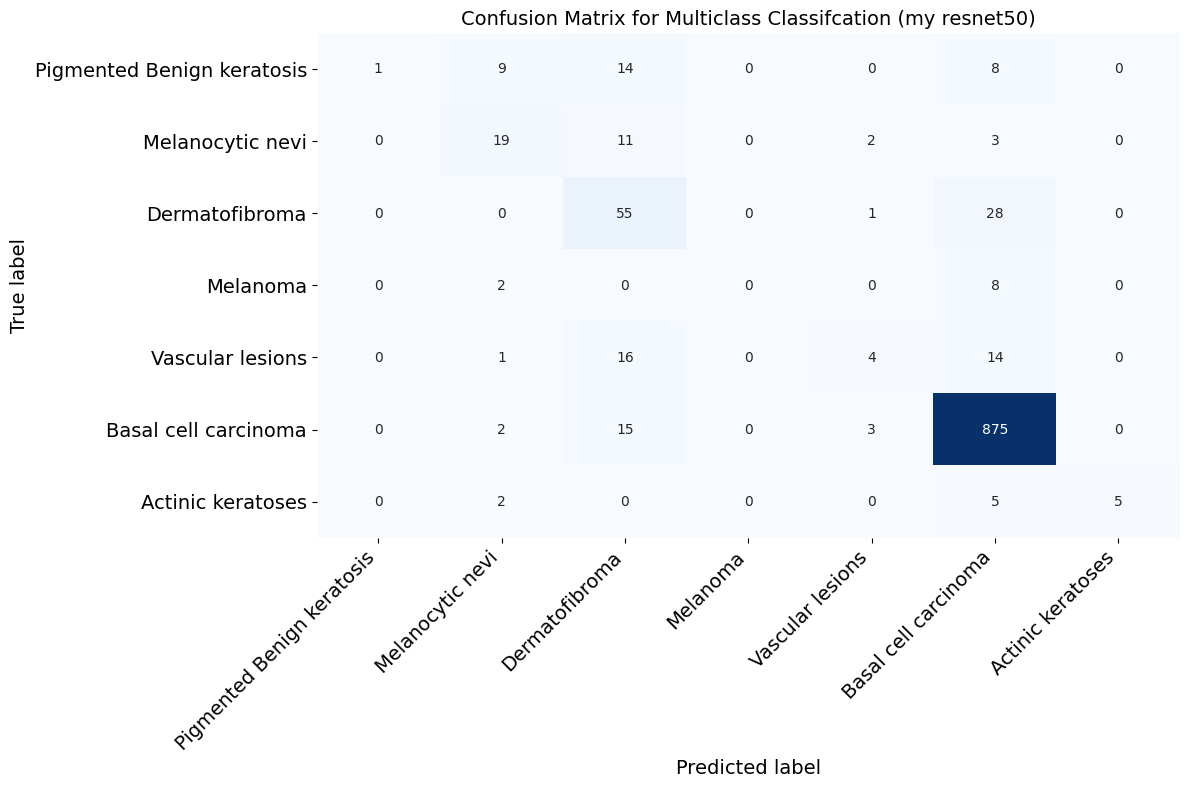

In [10]:
visualizer.model_report(
    model_name = ResNet50_name,
    trainlabels = trainlabels,
    train_pred_classes = train_pred_classes,
    testlabels = testlabels,
    test_pred_classes = test_pred_classes,
    lesion_type_dict = utilInstance.lesion_type_dict
)
